<h1>La visualisation des données </h1>

<h2>I.LOAD CSV</h2>

In [49]:
from pandas import read_csv
import numpy as np
filename = '../datasets/wdbc.data.csv'
data = read_csv(filename, header=None,)
print(f'Shape: {data.shape}')
print(data)

Shape: (569, 32)
           0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26 

<h2>II.Statistiques descriptif</h2>

In [25]:
from pandas import set_option
set_option('display.width', 100)
set_option('display.precision', 7)
desc=data.describe()
print(desc)

                  0            2            3            4             5            6   \
count  5.6900000e+02  569.0000000  569.0000000  569.0000000   569.0000000  569.0000000   
mean   3.0371831e+07   14.1272917   19.2896485   91.9690334   654.8891037    0.0963603   
std    1.2502059e+08    3.5240488    4.3010358   24.2989810   351.9141292    0.0140641   
min    8.6700000e+03    6.9810000    9.7100000   43.7900000   143.5000000    0.0526300   
25%    8.6921800e+05   11.7000000   16.1700000   75.1700000   420.3000000    0.0863700   
50%    9.0602400e+05   13.3700000   18.8400000   86.2400000   551.1000000    0.0958700   
75%    8.8131290e+06   15.7800000   21.8000000  104.1000000   782.7000000    0.1053000   
max    9.1132050e+08   28.1100000   39.2800000  188.5000000  2501.0000000    0.1634000   

                7            8            9            10  ...           22           23  \
count  569.0000000  569.0000000  569.0000000  569.0000000  ...  569.0000000  569.0000000   
mean 

<h2>III.Graphique de densité</h2>

Density plot :


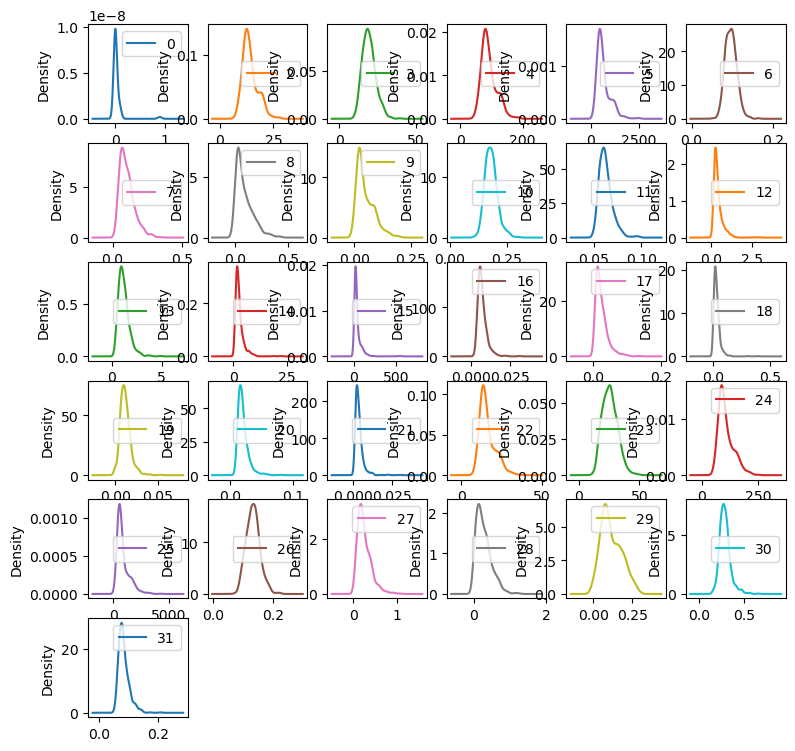

In [26]:
from matplotlib import pyplot
print('Density plot :')
data.plot(kind='density', subplots=True,layout=(6, 6), sharex=False, figsize=(9,9))
pyplot.show()

<h2>IV.Box & Whisker Plots</h2>

Box and Whisker plots
-------------------


IndexError: index 0 is out of bounds for axis 0 with size 0

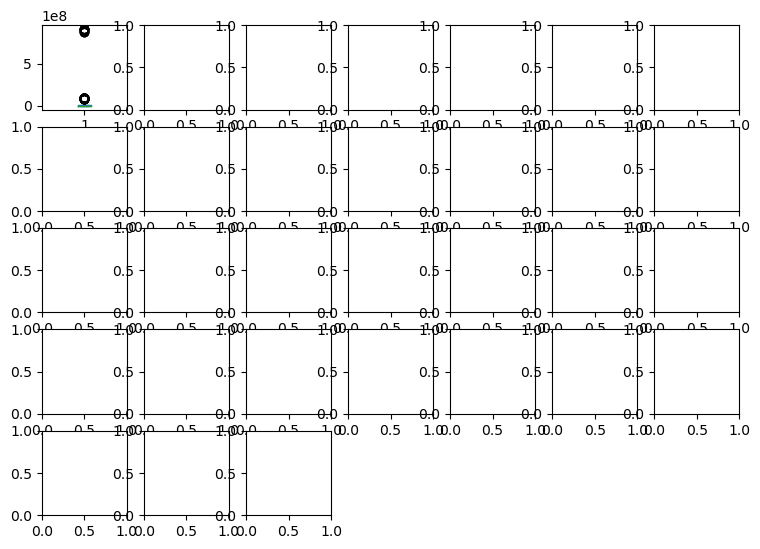

In [68]:
from matplotlib import pyplot
print('Box and Whisker plots\n-------------------')
data.plot(kind='box', subplots=True,layout=(7, 7), sharex=True,sharey=False, figsize=(9,9))
pyplot.show()

<h2>VI.La correlation</h2>

Scatter plots


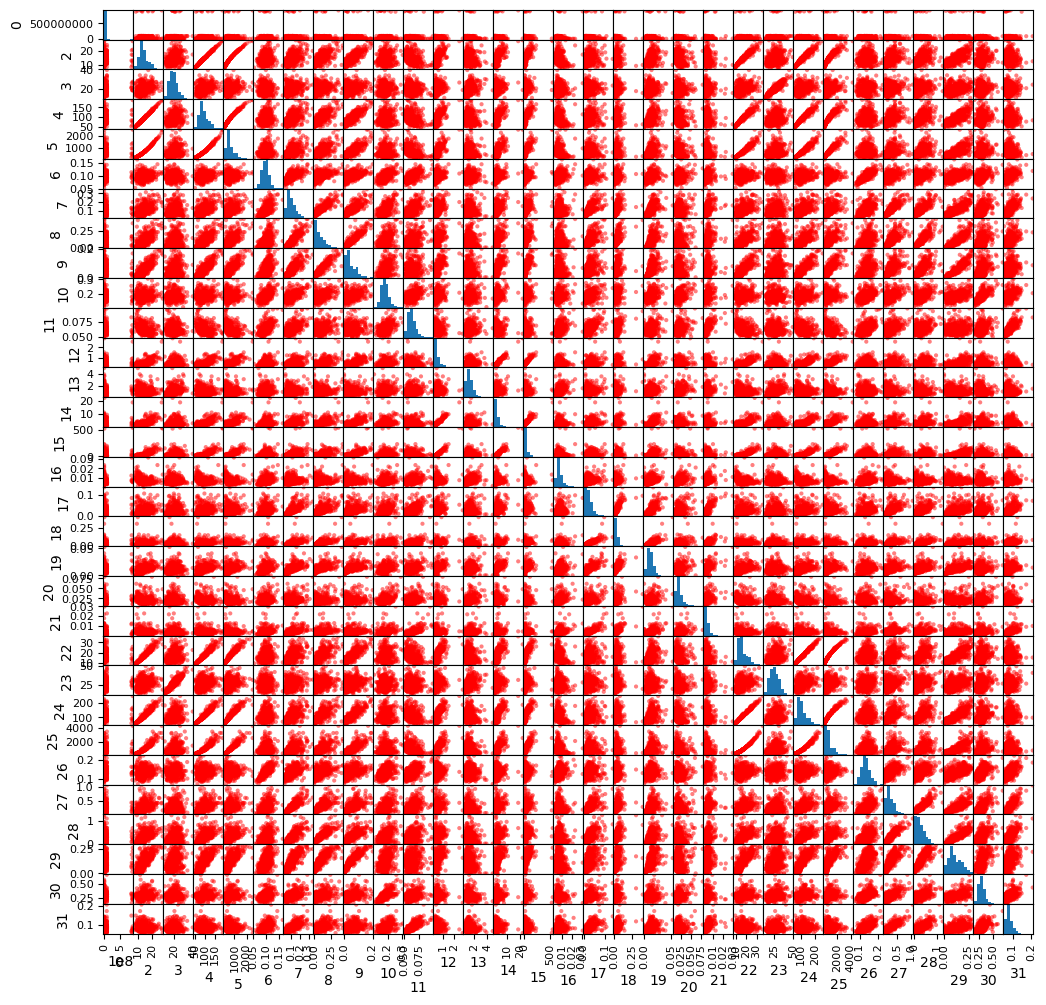

In [13]:
from pandas.plotting import scatter_matrix
print('Scatter plots')
scatter_matrix(data, figsize=(12,12),color='r')
pyplot.show()

<h2>LA CLASSIFICATION </h2>

LR | Acc: 95.0% (3.0)%
LDA | Acc: 95.0% (2.0)%
KNN | Acc: 93.0% (3.0)%
CART | Acc: 92.0% (3.0)%
NB | Acc: 94.0% (3.0)%
SVM | Acc: 92.0% (4.0)%


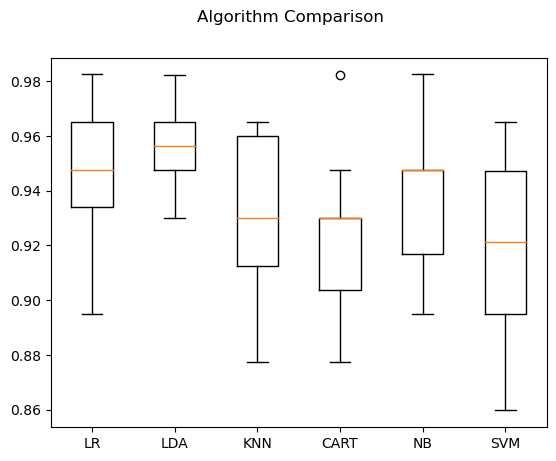

In [53]:
# Compare Algorithms
# Import libraries
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
# Machine Learning Module
from sklearn.model_selection import KFold, cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# ML metrics
from sklearn.metrics import confusion_matrix, classification_report

 

# Get values from dataframe
array = data.values
# Get inputs (all variables except the class)
X = array[ : , 2:]
# Get the output (class)
Y = array[ : , 1]
# Prepare models

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
score = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = f'{name} | Acc: {cv_results.mean().round(2)*100.0}% ({cv_results.std().round(2)*100.0})%'
    print(msg)
    
    
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()






<h1>PART 2(LA REGRESSION)<h1/>

In [58]:
from pandas import read_csv
import numpy as np
filename2 = '../datasets/winequality-red.csv'
data2 = read_csv(filename2, header=None,)
print(f'Shape: {data2.shape}')
print(data)

Shape: (1600, 1)
           0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26 

<h2>II.Statistiques descriptif</h2>

In [60]:
from pandas import set_option
set_option('display.width', 100)
set_option('display.precision', 7)
desc=data.describe()
print(desc)

                  0            2            3            4             5            6   \
count  5.6900000e+02  569.0000000  569.0000000  569.0000000   569.0000000  569.0000000   
mean   3.0371831e+07   14.1272917   19.2896485   91.9690334   654.8891037    0.0963603   
std    1.2502059e+08    3.5240488    4.3010358   24.2989810   351.9141292    0.0140641   
min    8.6700000e+03    6.9810000    9.7100000   43.7900000   143.5000000    0.0526300   
25%    8.6921800e+05   11.7000000   16.1700000   75.1700000   420.3000000    0.0863700   
50%    9.0602400e+05   13.3700000   18.8400000   86.2400000   551.1000000    0.0958700   
75%    8.8131290e+06   15.7800000   21.8000000  104.1000000   782.7000000    0.1053000   
max    9.1132050e+08   28.1100000   39.2800000  188.5000000  2501.0000000    0.1634000   

                7            8            9            10  ...           22           23  \
count  569.0000000  569.0000000  569.0000000  569.0000000  ...  569.0000000  569.0000000   
mean 

<h2>III.Graphique de densité</h2>

Density plot :


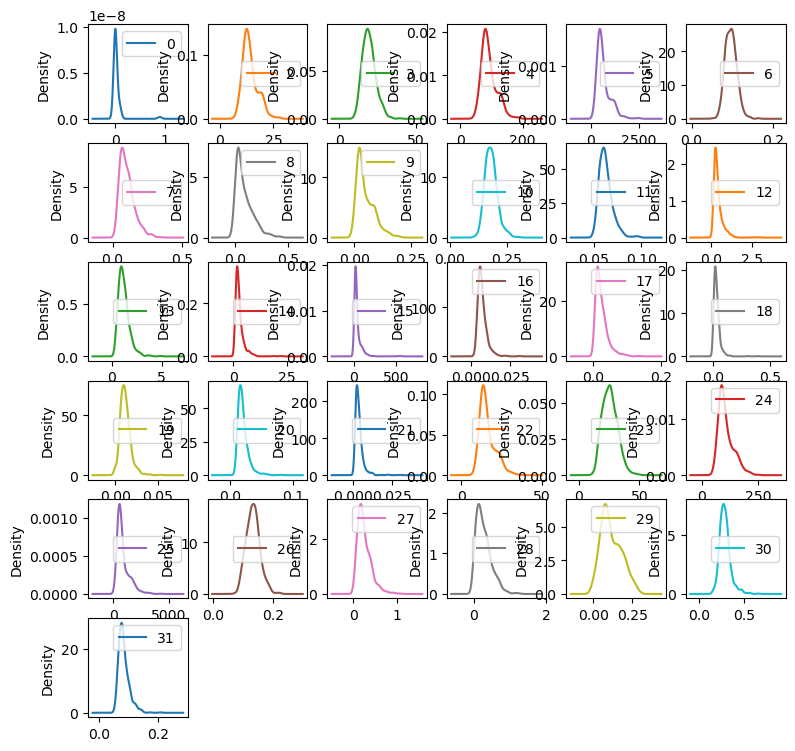

In [63]:
from matplotlib import pyplot
print('Density plot :')
data.plot(kind='density', subplots=True,layout=(6, 6), sharex=False, figsize=(9,9))
pyplot.show()

<h2>IV.Box & Whisker Plots</h2>

Box and Whisker plots
-------------------


IndexError: index 0 is out of bounds for axis 0 with size 0

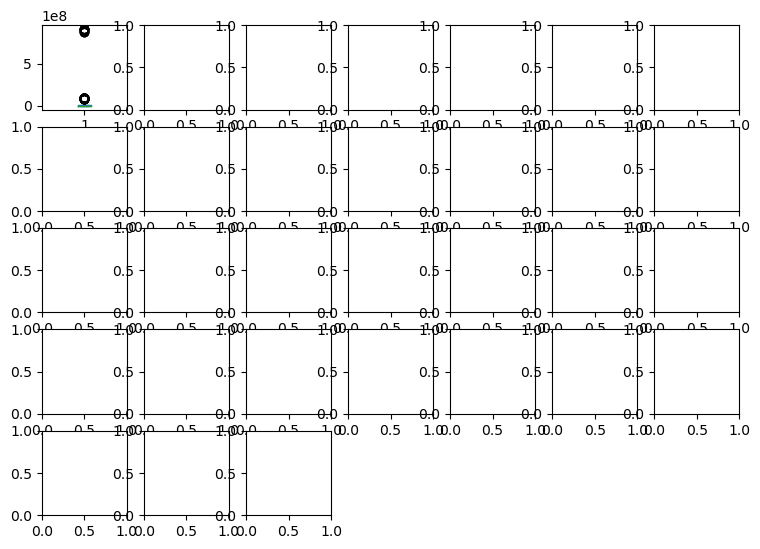

In [70]:
from matplotlib import pyplot as plt
print('Box and Whisker plots\n-------------------')
data.plot(kind='box', subplots=True,layout=(7, 7), sharex=True,sharey=False, figsize=(9,9))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
print('Scatter plots')
scatter_matrix(data, figsize=(9,9),color='r')
pyplot.show()

Scatter plots
